# Set-up

In [28]:
import wrds
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


# Get the current working directory
script_dir = os.getcwd()
fig_dir = '/Users/zrsong/MIT Dropbox/Zirui Song/Apps/Overleaf/Information Covenants of Nonbank Direct Lending/Figures'

# Set the working directory to the current script's directory (which in this case is already the working directory)
os.chdir(script_dir)

print(f"Working directory is set to: {script_dir}")


Working directory is set to: /Users/zrsong/MIT Dropbox/Zirui Song/Research Projects/Direct Lending/Code


In [29]:
# import from Data/Cleaned folder
data = pd.read_csv('../Data/Cleaned/final_regression_sample.csv')

# Deal Counts and Shares

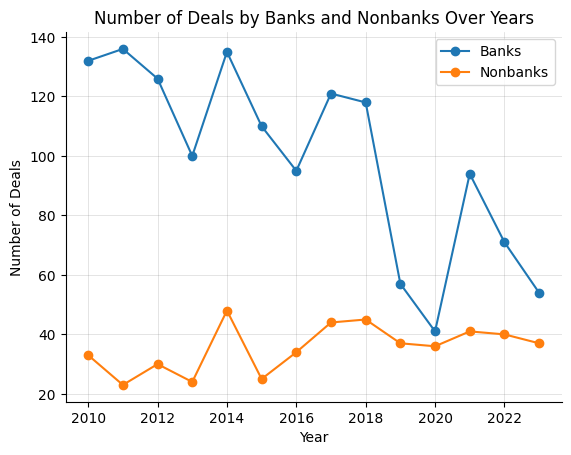

In [30]:
# Group by year and lender_is_nonbank, then count the number of deals
deals_by_year = data.groupby(['year', 'lender_is_nonbank']).size().unstack()

# Plot the data
deals_by_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Deals')
plt.title('Number of Deals by Banks and Nonbanks Over Years')
plt.legend(['Banks', 'Nonbanks'])
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)  # Enable grid with lighter shade

# Remove the boxes around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save to fig_dir as png
plt.savefig(f"{fig_dir}/dealcounts_by_year.png", dpi=300, bbox_inches='tight')


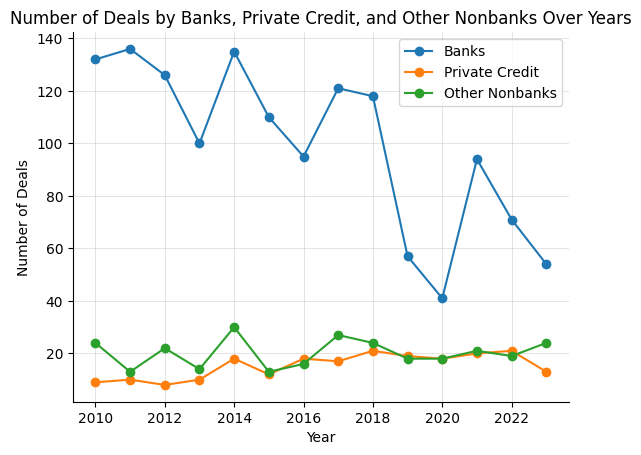

In [31]:
# Filter data for banks, private credit lenders, and other nonbanks
banks = data[data['lender_is_nonbank'] == 0]
private_credit = data[data['lender_is_private_credit'] == 1]
other_nonbanks = data[data['lender_is_other_nonbank'] == 1]

# Group by year and count the number of deals for each group
deals_by_year_banks = banks.groupby('year').size()
deals_by_year_private_credit = private_credit.groupby('year').size()
deals_by_year_other_nonbanks = other_nonbanks.groupby('year').size()

# Create a DataFrame to hold the counts
deals_by_year_combined = pd.DataFrame({
    'Banks': deals_by_year_banks,
    'Private Credit': deals_by_year_private_credit,
    'Other Nonbanks': deals_by_year_other_nonbanks
})

# Plot the data
deals_by_year_combined.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Deals')
plt.title('Number of Deals by Banks, Private Credit, and Other Nonbanks Over Years')
plt.legend(['Banks', 'Private Credit', 'Other Nonbanks'])
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)  # Enable grid with lighter shade

# Remove the boxes around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save to fig_dir as png
plt.savefig(f"{fig_dir}/dealcounts_by_lender_type.png", dpi=300, bbox_inches='tight')

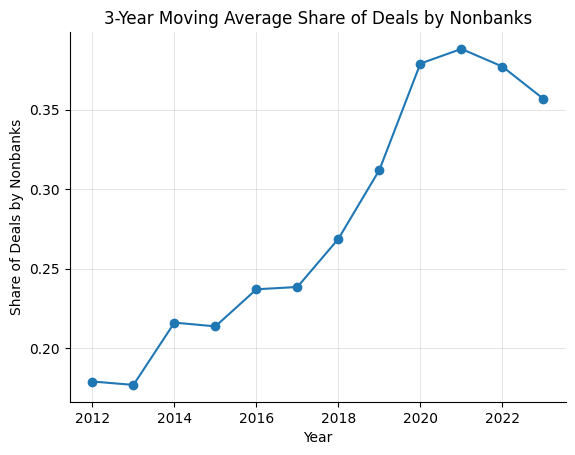

In [32]:
# Calculate the 3-year moving average of the share of deals by nonbanks
# Calculate the share of deals by nonbanks
deals_by_year['Nonbank_Share'] = deals_by_year[1] / (deals_by_year[0] + deals_by_year[1])

# Calculate the 3-year moving average of the share of deals by nonbanks
deals_by_year['Nonbank_Share_MA'] = deals_by_year['Nonbank_Share'].rolling(window=3).mean()

# Plot the 3-year moving average of the share of deals by nonbanks over the years
deals_by_year['Nonbank_Share_MA'].plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Share of Deals by Nonbanks')
plt.title('3-Year Moving Average Share of Deals by Nonbanks')
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)  # Enable grid with lighter shade
# Remove the boxes around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save to fig_dir as png
plt.savefig(f"{fig_dir}/dealshares_by_year.png", dpi=300, bbox_inches='tight')

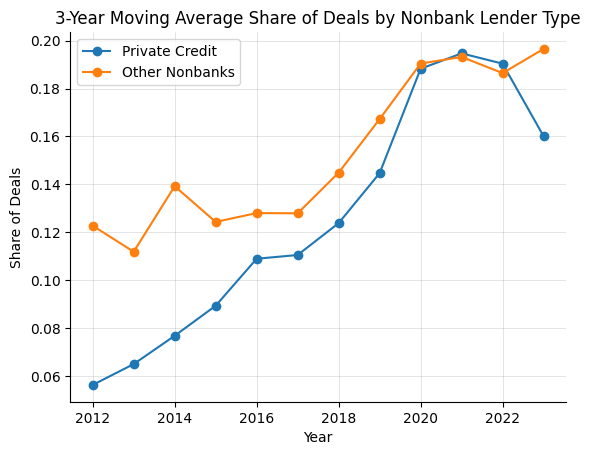

In [33]:
# Calculate the share of deals for private credit, and other nonbanks
deals_by_year_combined['Private_Credit_Share'] = deals_by_year_combined['Private Credit'] / deals_by_year_combined.sum(axis=1)
deals_by_year_combined['Other_Nonbank_Share'] = deals_by_year_combined['Other Nonbanks'] / deals_by_year_combined.sum(axis=1)

# Calculate the 3-year moving average of the share of deals for private credit, and other nonbanks
deals_by_year_combined['Private_Credit_Share_MA'] = deals_by_year_combined['Private_Credit_Share'].rolling(window=3).mean()
deals_by_year_combined['Other_Nonbank_Share_MA'] = deals_by_year_combined['Other_Nonbank_Share'].rolling(window=3).mean()

# Plot the 3-year moving average of the share of deals for banks, private credit, and other nonbanks over the years
deals_by_year_combined[['Private_Credit_Share_MA', 'Other_Nonbank_Share_MA']].plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Share of Deals')
plt.title('3-Year Moving Average Share of Deals by Nonbank Lender Type')
plt.legend(['Private Credit', 'Other Nonbanks'])
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)  # Enable grid with lighter shade
# Remove the boxes around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save to fig_dir as png
plt.savefig(f"{fig_dir}/dealshares_by_lender_type.png", dpi=300, bbox_inches='tight')

# Information Covenant Usage

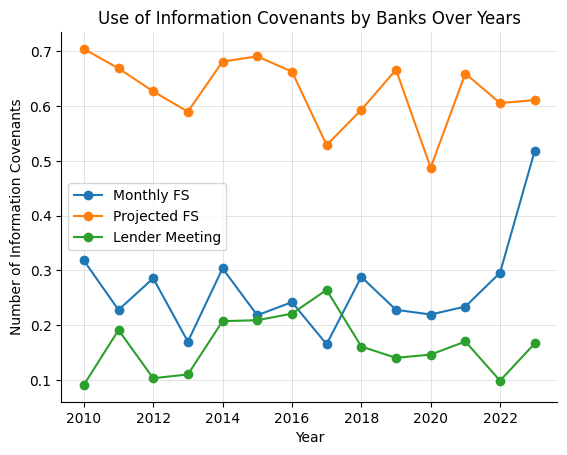

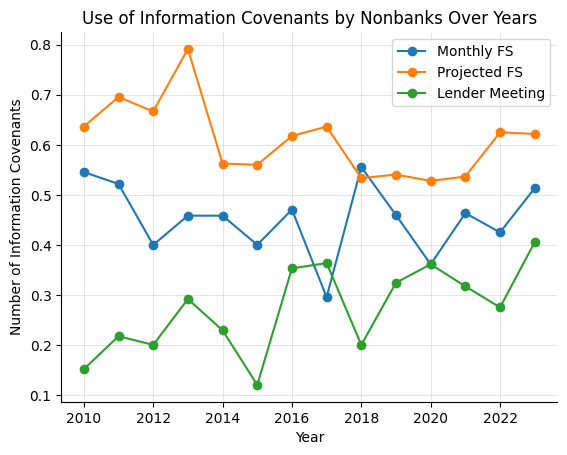

In [34]:
# rename monthly_fs to monthly_financial_statement and projected_fs to projected_financial_statement
data.rename(columns={'monthly_fs': 'monthly_financial_statement', 'projected_fs': 'projected_financial_statement'}, inplace=True)

# Filter data for banks and nonbanks
banks = data[data['lender_is_nonbank'] == 0]
nonbanks = data[data['lender_is_nonbank'] == 1]

# Define the three types of information covenants
info_covenants = ['monthly_financial_statement', 'projected_financial_statement', 'lender_meeting']

# Group by year and count the occurrences of each type of information covenant for banks
banks_info_covenants = banks.groupby('year')[info_covenants].mean()

# Group by year and count the occurrences of each type of information covenant for nonbanks
nonbanks_info_covenants = nonbanks.groupby('year')[info_covenants].mean()

# Plot the data for banks
banks_info_covenants.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Information Covenants')
plt.title('Use of Information Covenants by Banks Over Years')
plt.legend(['Monthly FS', 'Projected FS', 'Lender Meeting'])
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(fig_dir + 'info_covenants_by_banks.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot the data for nonbanks
nonbanks_info_covenants.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Information Covenants')
plt.title('Use of Information Covenants by Nonbanks Over Years')
plt.legend(['Monthly FS', 'Projected FS', 'Lender Meeting'])
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(f"{fig_dir}/info_covenants_by_nonbanks.png", dpi=300, bbox_inches='tight')


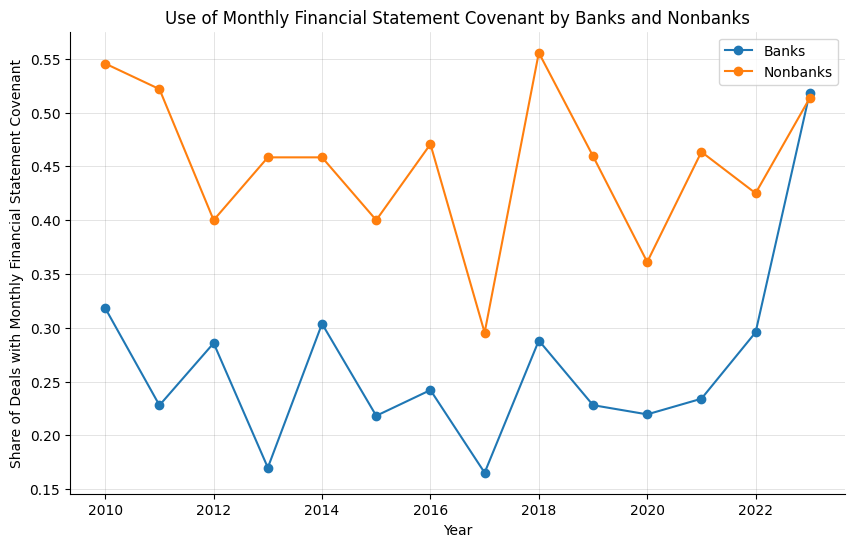

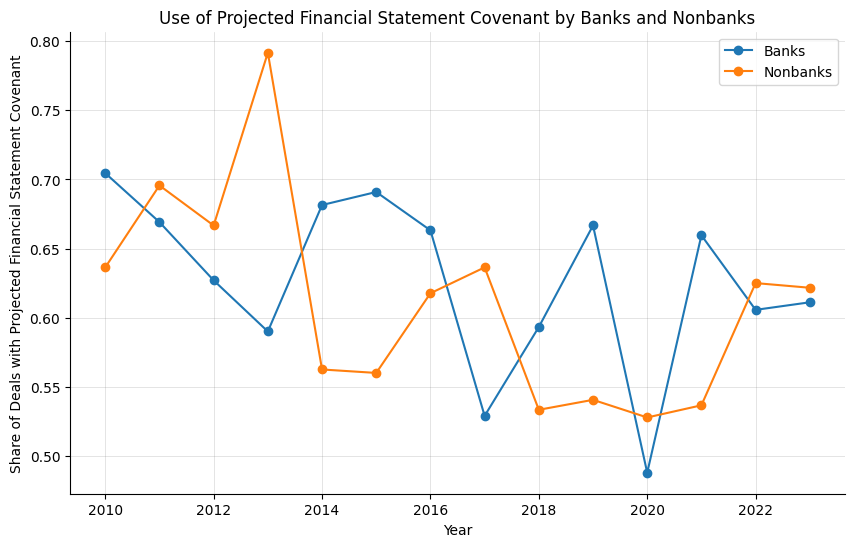

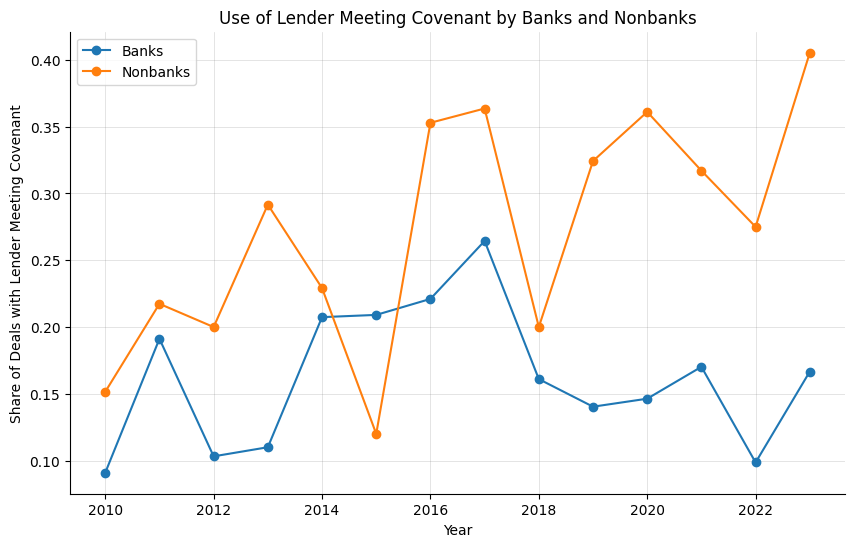

In [35]:
for covenant in info_covenants:
    plt.figure(figsize=(10, 6))
    plt.plot(banks_info_covenants.index, banks_info_covenants[covenant], marker='o', label='Banks')
    plt.plot(nonbanks_info_covenants.index, nonbanks_info_covenants[covenant], marker='o', label='Nonbanks')

    plt.xlabel('Year')
    plt.ylabel(f"Share of Deals with {' '.join([word.capitalize() for word in covenant.split('_')])} Covenant")
    plt.title(f"Use of {' '.join([word.capitalize() for word in covenant.split('_')])} Covenant by Banks and Nonbanks")
    plt.legend()
    plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Save to fig_dir as png
    plt.savefig(f"{fig_dir}/{covenant}_use_by_banks_and_nonbanks.png", dpi=300, bbox_inches='tight')
    plt.show()

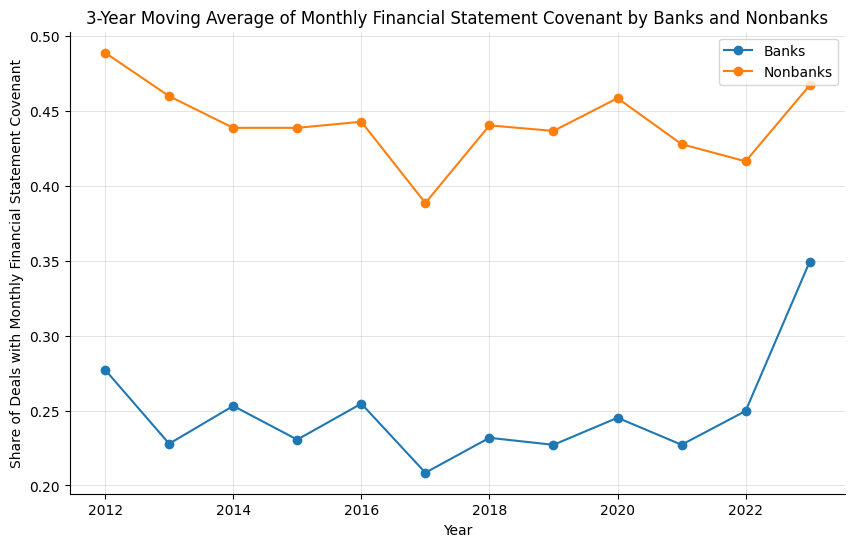

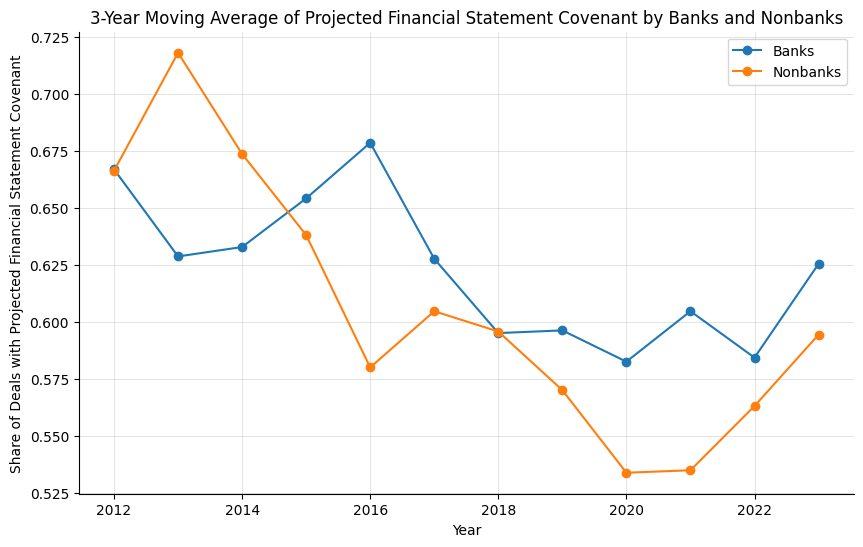

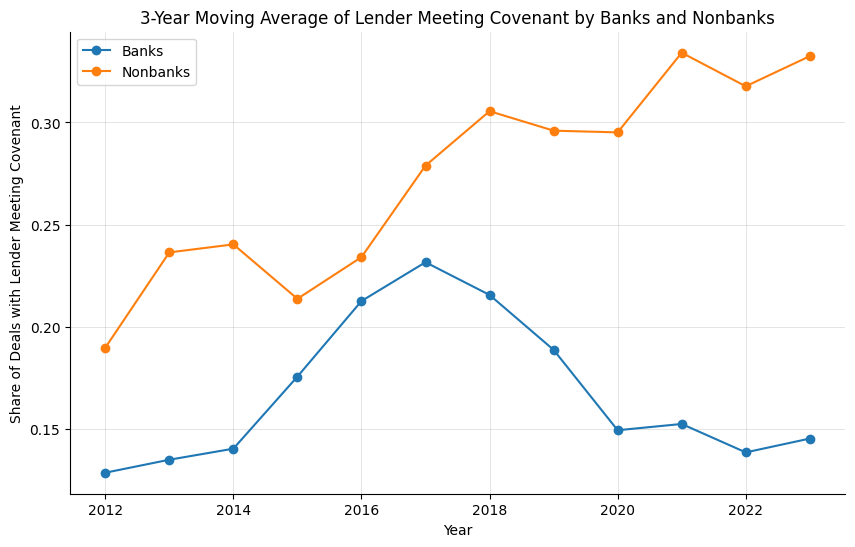

In [36]:
# Calculate the 3-year moving average for banks and nonbanks
banks_info_covenants_ma = banks_info_covenants.rolling(window=3).mean()
nonbanks_info_covenants_ma = nonbanks_info_covenants.rolling(window=3).mean()

# Plot the 3-year moving average for each covenant type by banks and nonbanks
for covenant in info_covenants:
    plt.figure(figsize=(10, 6))
    plt.plot(banks_info_covenants_ma.index, banks_info_covenants_ma[covenant], marker='o', label='Banks')
    plt.plot(nonbanks_info_covenants_ma.index, nonbanks_info_covenants_ma[covenant], marker='o', label='Nonbanks')

    plt.xlabel('Year')
    plt.ylabel(f"Share of Deals with {' '.join([word.capitalize() for word in covenant.split('_')])} Covenant")
    plt.title(f"3-Year Moving Average of {' '.join([word.capitalize() for word in covenant.split('_')])} Covenant by Banks and Nonbanks")
    plt.legend()
    plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Save to fig_dir as png
    plt.savefig(f"{fig_dir}/{covenant}_use_by_banks_and_nonbanks_ma.png", dpi=300, bbox_inches='tight')
    plt.show()

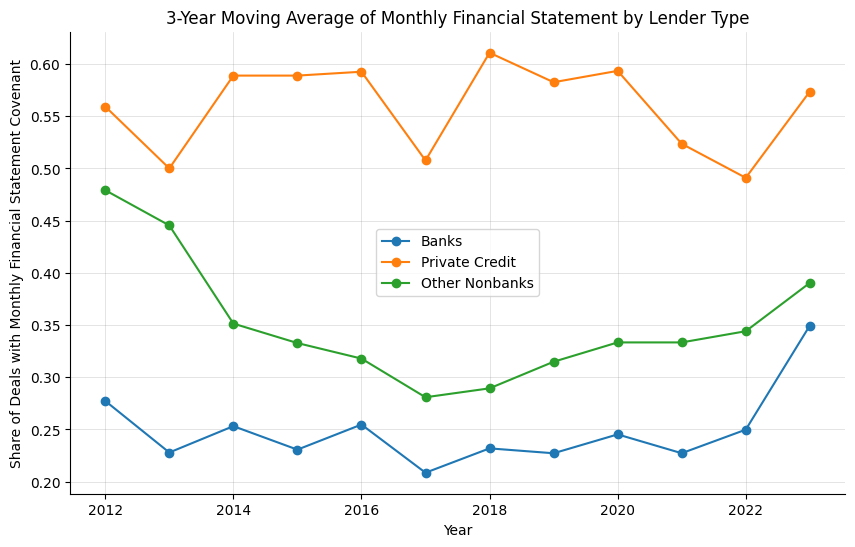

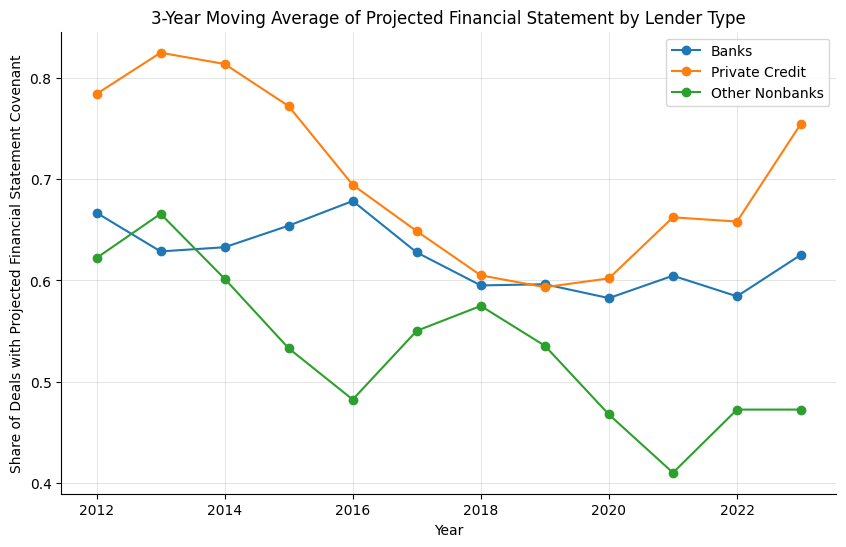

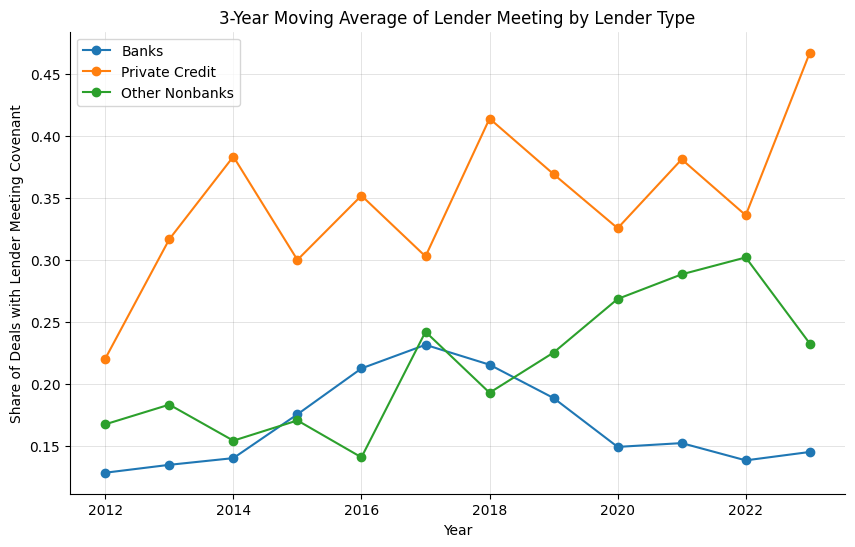

In [37]:
# Calculate the 3-year moving average for banks, private credit, and other nonbanks
banks_info_covenants_ma = banks_info_covenants.rolling(window=3).mean()

# Create copies and rename columns in private_credit and other_nonbanks
private_credit_copy = private_credit.copy()
private_credit_copy.rename(columns={'monthly_fs': 'monthly_financial_statement', 'projected_fs': 'projected_financial_statement'}, inplace=True)
other_nonbanks_copy = other_nonbanks.copy()
other_nonbanks_copy.rename(columns={'monthly_fs': 'monthly_financial_statement', 'projected_fs': 'projected_financial_statement'}, inplace=True)

# Plot the 3-year moving average for each covenant type by banks, private credit, and other nonbanks
for covenant in info_covenants:
    private_credit_info_covenants_ma = private_credit_copy.groupby('year')[info_covenants].mean().rolling(window=3).mean()
    other_nonbanks_info_covenants_ma = other_nonbanks_copy.groupby('year')[info_covenants].mean().rolling(window=3).mean()
    plt.figure(figsize=(10, 6))
    plt.plot(banks_info_covenants_ma.index, banks_info_covenants_ma[covenant], marker='o', label='Banks')
    plt.plot(private_credit_info_covenants_ma.index, private_credit_info_covenants_ma[covenant], marker='o', label='Private Credit')
    plt.plot(other_nonbanks_info_covenants_ma.index, other_nonbanks_info_covenants_ma[covenant], marker='o', label='Other Nonbanks')

    plt.xlabel('Year')
    plt.ylabel(f"Share of Deals with {' '.join([word.capitalize() for word in covenant.split('_')])} Covenant")
    plt.title(f"3-Year Moving Average of {' '.join([word.capitalize() for word in covenant.split('_')])} by Lender Type")
    plt.legend()
    plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Save to fig_dir as png
    plt.savefig(f"{fig_dir}/{covenant}_use_by_lender_type_ma.png", dpi=300, bbox_inches='tight')
    plt.show()

# OCC-Regulation

In [38]:
# Extract unique bank names from the 'lead_arranger' column
lead_arranger_names = banks['lead_arranger'].unique().tolist()

# Print the list of lead arranger names
print(lead_arranger_names)
# Create a DataFrame with lead_arranger and the number of deals that is the number of unique observations for that lead_arranger
deals_per_lead_arranger = banks.groupby('lead_arranger').size().reset_index(name='Number of Deals')

# Print the DataFrame
print(deals_per_lead_arranger)

['pnc bank', 'jpmorgan chase bank', 'goldman sachs lending partners llc', 'regions bank', 'j.p. morgan securities llc and landesbank baden-wÃ¼rttemberg', 'goldman sachs bank usa', 'j.p. morgan securities llc', 'bnp paribas', 'u.s. bank national association', 'bmo capital markets', 'crÃ©dit agricole corporate and investment bank', 'bmo harris bank n.a.', 'bank of america', 'keybank national association', 'capital one leverage finance corporation', 'suntrust bank', 'midfirst bank', 'wells fargo bank', 'wells fargo securities', 'citizens bank', 'j.p. morgan securities', 'jpmorgan securities llc', 'citigroup global markets inc.', 'morgan stanley senior funding', 'credit suisse ag', 'bofa securities', 'bankunited', 'bmo capital markets corp.', 'merrill lynch', 'suntrust robinson humphrey', 'credit suisse securities (usa) llc', 'cobank', 'texas capital bank', 'rbc capital markets', 'fifth third bank', 'nordea bank finland plc', 'j.p. morgan chase bank', 'deutsche bank trust company americas'

# Discontinuity Design

In [39]:
# import from Data/Intermediate
data_final = pd.read_csv("../Data/Intermediate/full_sample_without_int.csv")
# keep only those with ebitda_generated = 0
data_final = data_final[data_final['ebitda_generated'] == 0]

KeyError: 'ebitda_generated'

/var/folders/n2/pgdf58ms1yd3ch8xjn9fmpmm0000gq/T/ipykernel_8657/820919459.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_nonbank_per_bin = data_final.groupby('ebitda_bin')['lender_is_nonbank'].mean()


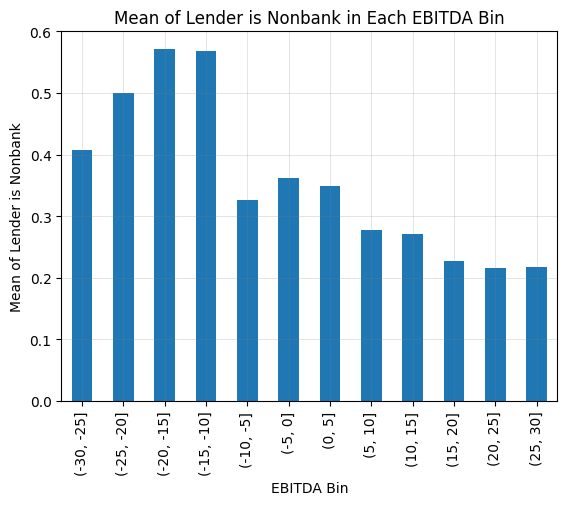

In [ ]:
# Generate bins of 5 around 0 for prev_ebitda
bins = np.arange(-30, 35, 5)

# Bin the data based on prev_ebitda
data_final['ebitda_bin'] = pd.cut(data_final['prev_ebitda'], bins)

# Calculate the mean of lender_is_nonbank in each bin
mean_nonbank_per_bin = data_final.groupby('ebitda_bin')['lender_is_nonbank'].mean()

# Plot the mean of lender_is_nonbank in each bin
mean_nonbank_per_bin.plot(kind='bar')
plt.xlabel('EBITDA Bin')
plt.ylabel('Mean of Lender is Nonbank')
plt.title('Mean of Lender is Nonbank in Each EBITDA Bin')
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
plt.show()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the running variable and the outcome variable
running_var = data_final['prev_ebitda']
outcome_var = data_final['lender_is_nonbank']

# Create a treatment variable that is 1 if prev_ebitda is greater than or equal to 0, and 0 otherwise
data_final['treatment'] = (running_var >= 0).astype(int)

# Fit the regression discontinuity model
model = smf.ols('lender_is_nonbank ~ treatment + prev_ebitda + I(prev_ebitda * treatment)', data=data_final).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      lender_is_nonbank   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     127.6
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           4.64e-80
Time:                        02:08:38   Log-Likelihood:                -2602.3
No. Observations:                5814   AIC:                             5213.
Df Residuals:                    5810   BIC:                             5239.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           